In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [88]:
housing = pd.read_csv('data.csv')

In [89]:
housing.head()

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3,41,0,5.0,1.0,322,2.6,37.9,-122.2,4.5
1,8.3,21,0,6.2,1.0,2401,2.1,37.9,-122.2,3.6
2,7.3,52,0,8.3,1.1,496,2.8,37.9,-122.2,3.5
3,5.6,52,1,5.8,1.1,558,2.5,37.9,-122.3,3.4
4,3.8,52,1,6.3,1.1,565,2.2,37.9,-122.3,3.4


In [90]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       800 non-null    float64
 1   HouseAge     800 non-null    int64  
 2   CHAS         800 non-null    int64  
 3   AveRooms     800 non-null    float64
 4   AveBedrms    800 non-null    float64
 5   Population   800 non-null    int64  
 6   AveOccup     800 non-null    float64
 7   Latitude     800 non-null    float64
 8   Longitude    800 non-null    float64
 9   MedHouseVal  800 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 62.6 KB


In [91]:
housing['CHAS'].value_counts()

CHAS
0    417
1    383
Name: count, dtype: int64

In [92]:
housing.describe()

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,3.544000,41.337500,0.478750,5.099250,1.057875,1042.268750,2.648000,37.783125,-122.211250,2.006875
std,1.779508,10.957585,0.499861,1.186374,0.113486,710.101385,0.757967,0.074563,0.078301,0.911443
min,0.500000,2.000000,0.000000,1.700000,0.600000,18.000000,1.400000,37.600000,-122.300000,0.600000
25%,2.400000,35.000000,0.000000,4.300000,1.000000,617.500000,2.200000,37.700000,-122.300000,1.400000
50%,3.100000,43.500000,0.000000,4.900000,1.100000,896.000000,2.600000,37.800000,-122.200000,1.800000
75%,4.300000,52.000000,1.000000,5.800000,1.100000,1237.750000,2.900000,37.800000,-122.200000,2.500000
max,13.500000,52.000000,1.000000,9.200000,2.700000,7427.000000,12.200000,37.900000,-122.000000,5.000000


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [94]:
housing1 = pd.DataFrame(housing, columns = housing.columns)

In [95]:
housing1

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3,41,0,5.0,1.0,322,2.6,37.9,-122.2,4.5
1,8.3,21,0,6.2,1.0,2401,2.1,37.9,-122.2,3.6
2,7.3,52,0,8.3,1.1,496,2.8,37.9,-122.2,3.5
3,5.6,52,1,5.8,1.1,558,2.5,37.9,-122.3,3.4
4,3.8,52,1,6.3,1.1,565,2.2,37.9,-122.3,3.4
...,...,...,...,...,...,...,...,...,...,...
795,3.1,23,1,4.5,1.1,1109,2.7,37.6,-122.1,1.8
796,3.8,31,0,4.1,0.9,548,3.0,37.6,-122.1,1.8
797,4.3,33,1,4.6,0.9,431,2.9,37.6,-122.1,1.9
798,3.9,36,1,4.9,0.8,463,2.9,37.6,-122.1,1.8


In [96]:
from sklearn.model_selection import StratifiedShuffleSplit
sp = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in sp.split(housing1, housing1['CHAS']):
    housing_train = housing1.loc[train_index]
    housing_test = housing1.loc[test_index]

In [97]:
housing_train['CHAS'].value_counts()

CHAS
0    334
1    306
Name: count, dtype: int64

In [98]:
housing_test['CHAS'].value_counts()

CHAS
0    83
1    77
Name: count, dtype: int64

In [99]:
housing_train

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
625,3.2,38,0,4.5,1.0,481,2.4,37.7,-122.2,1.8
422,6.7,42,0,6.4,1.0,1031,2.3,37.9,-122.3,3.7
358,4.8,27,1,6.3,1.0,1297,3.7,37.8,-122.1,2.8
286,3.4,43,1,4.9,1.1,1085,2.7,37.8,-122.2,1.4
752,3.2,28,0,4.7,1.2,1198,1.9,37.7,-122.1,2.1
...,...,...,...,...,...,...,...,...,...,...
155,8.9,52,1,9.0,1.1,861,3.3,37.8,-122.2,4.1
496,3.3,52,0,4.8,1.0,1508,2.0,37.9,-122.3,3.1
540,3.0,52,1,4.2,1.0,870,2.5,37.8,-122.3,2.2
746,3.1,39,0,4.3,1.0,1408,2.9,37.7,-122.1,1.5


In [100]:
corr_matrix = housing_train.corr()
corr_matrix['MedHouseVal'].sort_values(ascending = False)

MedHouseVal    1.000000
MedInc         0.766739
AveRooms       0.565062
Latitude       0.163375
Population     0.059687
Longitude      0.032841
HouseAge       0.020734
CHAS          -0.005795
AveBedrms     -0.188123
AveOccup      -0.189332
Name: MedHouseVal, dtype: float64

array([[<Axes: xlabel='MedHouseVal', ylabel='MedHouseVal'>,
        <Axes: xlabel='MedInc', ylabel='MedHouseVal'>,
        <Axes: xlabel='AveRooms', ylabel='MedHouseVal'>],
       [<Axes: xlabel='MedHouseVal', ylabel='MedInc'>,
        <Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>],
       [<Axes: xlabel='MedHouseVal', ylabel='AveRooms'>,
        <Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>]], dtype=object)

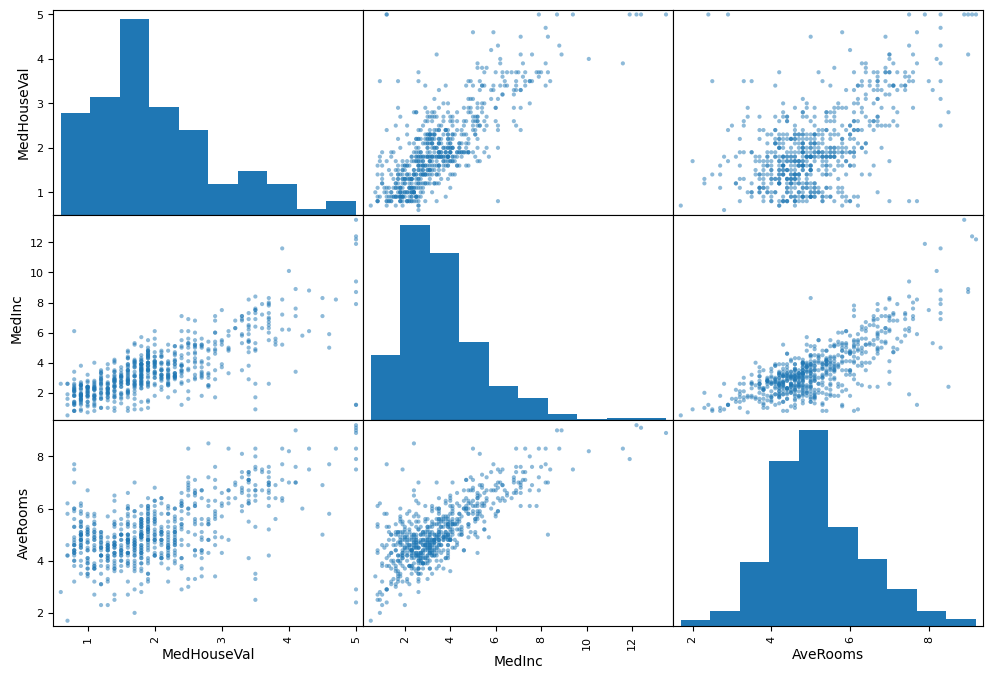

In [101]:
from pandas.plotting import scatter_matrix
attributes = ['MedHouseVal', 'MedInc', 'AveRooms']
scatter_matrix(housing_train[attributes], figsize = (12,8))

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

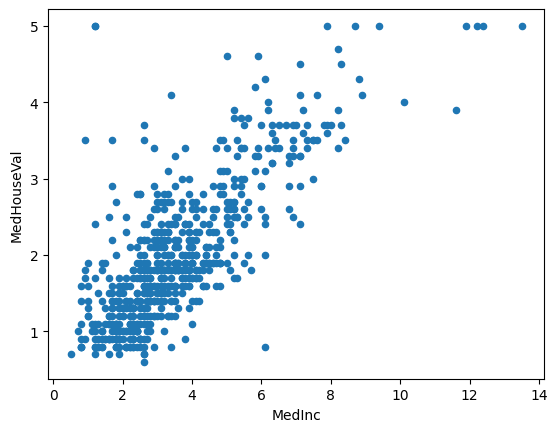

In [102]:
housing_train.plot(kind = "scatter", x = 'MedInc', y = 'MedHouseVal')

In [103]:
housing_train

,MedInc,HouseAge,CHAS,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
625,3.2,38,0,4.5,1.0,481,2.4,37.7,-122.2,1.8
422,6.7,42,0,6.4,1.0,1031,2.3,37.9,-122.3,3.7
358,4.8,27,1,6.3,1.0,1297,3.7,37.8,-122.1,2.8
286,3.4,43,1,4.9,1.1,1085,2.7,37.8,-122.2,1.4
752,3.2,28,0,4.7,1.2,1198,1.9,37.7,-122.1,2.1
...,...,...,...,...,...,...,...,...,...,...
155,8.9,52,1,9.0,1.1,861,3.3,37.8,-122.2,4.1
496,3.3,52,0,4.8,1.0,1508,2.0,37.9,-122.3,3.1
540,3.0,52,1,4.2,1.0,870,2.5,37.8,-122.3,2.2
746,3.1,39,0,4.3,1.0,1408,2.9,37.7,-122.1,1.5


In [104]:
corr_matrix = housing_train.corr()
corr_matrix['MedHouseVal'].sort_values(ascending = False)

MedHouseVal    1.000000
MedInc         0.766739
AveRooms       0.565062
Latitude       0.163375
Population     0.059687
Longitude      0.032841
HouseAge       0.020734
CHAS          -0.005795
AveBedrms     -0.188123
AveOccup      -0.189332
Name: MedHouseVal, dtype: float64

In [105]:
housing_train_features = housing_train.drop("MedHouseVal", axis = 1)
housing_train_label = housing_train["MedHouseVal"].copy()

## Selecting the Desired Model for Muzammil Real Estate Developers

In [106]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_train_features, housing_train_label)

RandomForestRegressor()

In [121]:
predictions = model.predict(housing_test.drop(['MedHouseVal'],axis=1))


array([1.976, 2.116, 1.902, 2.   , 0.89 , 1.232, 2.34 , 2.126, 2.017,
       2.534, 1.09 , 2.058, 1.716, 1.543, 0.943, 1.718, 1.614, 1.858,
       0.955, 1.197, 2.115, 1.384, 2.477, 3.157, 2.408, 2.14 , 0.9  ,
       2.377, 1.897, 1.269, 1.982, 2.627, 1.845, 1.694, 3.551, 2.064,
       2.163, 1.686, 1.804, 2.164, 1.3  , 1.963, 3.708, 2.071, 1.488,
       2.154, 2.118, 1.644, 1.118, 1.228, 3.916, 3.168, 1.843, 2.174,
       1.02 , 1.179, 3.692, 3.385, 1.735, 1.927, 2.381, 1.252, 1.986,
       3.804, 1.749, 0.991, 2.313, 2.144, 1.675, 2.483, 1.129, 1.301,
       2.118, 2.44 , 0.971, 1.644, 1.276, 2.587, 1.63 , 2.263, 2.192,
       2.249, 1.732, 1.548, 2.205, 2.097, 0.944, 2.041, 3.623, 0.906,
       3.374, 2.537, 1.461, 1.129, 1.19 , 1.949, 1.984, 1.578, 1.03 ,
       1.095, 3.598, 1.989, 1.926, 2.791, 1.212, 1.472, 1.531, 1.421,
       2.418, 1.869, 1.96 , 2.602, 3.265, 2.182, 2.505, 1.603, 0.831,
       1.654, 1.236, 1.624, 2.211, 3.664, 1.356, 3.314, 3.155, 2.129,
       1.822, 1.862,

In [119]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(predictions,housing_test['MedHouseVal'])
mse = mean_squared_error(predictions,housing_test['MedHouseVal'])
rmse = np.sqrt(mse)

In [120]:
mae, rmse

(0.30271875, 0.4880702626159476)